# **Image Processing - Groep: Traffic**


### *Miguel, Sebbe en Samir*

**Bronnen**:


https://github.com/BenyaminZojaji/Dice-Recognition/blob/main/dice_recognition.ipynb


https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de


https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga47849c3be0d0406ad3ca45db65a25d2d

<br>

**Extra informatie - Word document:**

https://hogeschoolpxl-my.sharepoint.com/:w:/g/personal/12100407_student_pxl_be/EetU3HRKMhVGloBa1NJMx1oB-EbDLSCNoqkjaIxLAqzcpg?e=mWOEN8

## Importeer libraries

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Verzamel Afbeeldingen


Al deze afbeeldingen zijn ontwatermerkt en verschaald naar 800x600.

In [13]:
!wget -O dice2.png "https://i.ibb.co/f2SfMgr/dice2-NW-SC.png"
!wget -O dice3.png "https://i.ibb.co/3k9T5hm/dice3-NW-SC.png"
!wget -O dice4.png "https://i.ibb.co/pvDYRV2/dice4-NW-SC.png"
!wget -O dice5.png "https://i.ibb.co/BzRypFZ/dice5-NW-SC.png"
!wget -O dice6.png "https://i.ibb.co/5MK1BrX/dice6-NW-SC.png"

--2024-01-24 14:34:41--  https://i.ibb.co/f2SfMgr/dice2-NW-SC.png
Resolving i.ibb.co (i.ibb.co)... 104.194.8.143, 104.194.8.143, 104.194.8.143, ...
Connecting to i.ibb.co (i.ibb.co)|104.194.8.143|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55401 (54K) [image/png]
Saving to: ‘dice2.png’

dice2.png           100%[===================>]  54.10K  --.-KB/s    in 0.01s   

2024-01-24 14:34:41 (5.23 MB/s) - ‘dice2.png’ saved [55401/55401]

--2024-01-24 14:34:41--  https://i.ibb.co/3k9T5hm/dice3-NW-SC.png
Resolving i.ibb.co (i.ibb.co)... 104.194.8.143, 104.194.8.143, 104.194.8.143, ...
Connecting to i.ibb.co (i.ibb.co)|104.194.8.143|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118108 (115K) [image/png]
Saving to: ‘dice3.png’

dice3.png           100%[===================>] 115.34K  --.-KB/s    in 0.02s   

2024-01-24 14:34:41 (6.20 MB/s) - ‘dice3.png’ saved [118108/118108]

--2024-01-24 14:34:41--  https://i.ibb.co/pvDYRV2/dice4-NW-SC.pn

## Dice 2

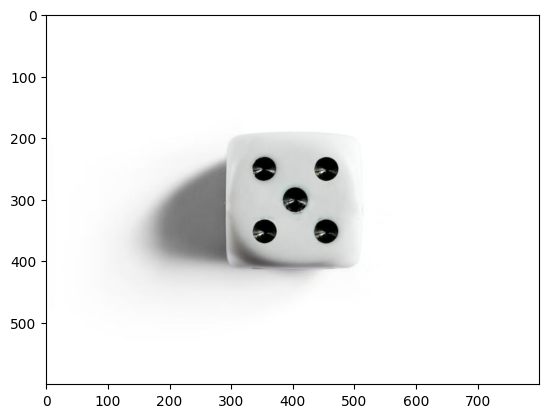

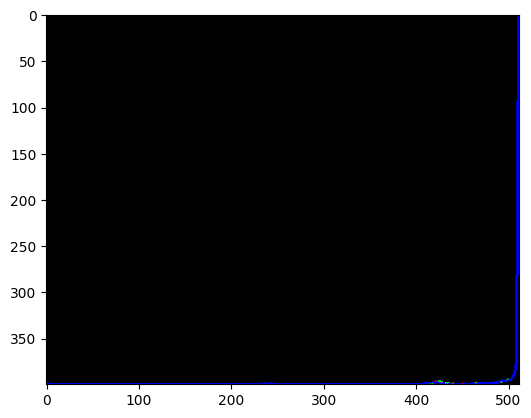

[[404 300  21]
 [454 250  18]
 [454 352  20]
 [354 350  19]
 [354 250  18]]


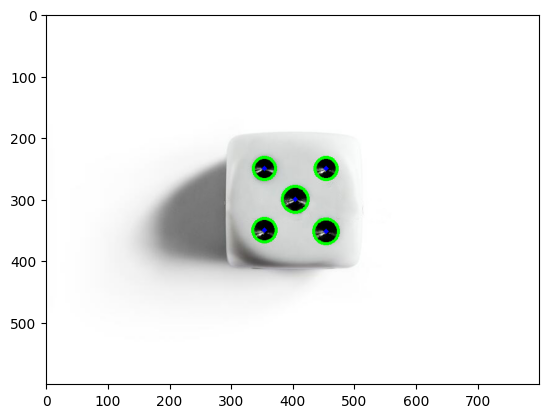

5


In [14]:
# Afbeelding inlezen
img2 = cv2.imread('dice2.png')

# CV2 leest standaard afbeeldingen in BGR in, vandaar de conversie naar RGB
rgb_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Ook verwacht matplotlib rgb image ipv bgr voor kleur foto's
plt.imshow(rgb_img2)
plt.show()

# Histogram
histSize = 256
histRange = (0, 256)

bgr_planes = cv2.split(img2)
b_hist = cv2.calcHist(bgr_planes, [0], None, [histSize], histRange, accumulate=False)
g_hist = cv2.calcHist(bgr_planes, [1], None, [histSize], histRange, accumulate=False)
r_hist = cv2.calcHist(bgr_planes, [2], None, [histSize], histRange, accumulate=False)

hist_w = 512
hist_h = 400
bin_w = int(round( hist_w/histSize ))

cv2.normalize(b_hist, b_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
cv2.normalize(g_hist, g_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
cv2.normalize(r_hist, r_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)

histImage = np.zeros((hist_h, hist_w, 3), dtype=np.uint8)

for i in range(1, histSize):
    cv2.line(histImage, ( bin_w*(i-1), hist_h - int(b_hist[i-1]) ),
            ( bin_w*(i), hist_h - int(b_hist[i]) ),
            ( 255, 0, 0), thickness=2)
    cv2.line(histImage, ( bin_w*(i-1), hist_h - int(g_hist[i-1]) ),
            ( bin_w*(i), hist_h - int(g_hist[i]) ),
            ( 0, 255, 0), thickness=2)
    cv2.line(histImage, ( bin_w*(i-1), hist_h - int(r_hist[i-1]) ),
            ( bin_w*(i), hist_h - int(r_hist[i]) ),
            ( 0, 0, 255), thickness=2)

plt.imshow(histImage)
plt.show()

# Converteert de originele img afbeelding naar gray
# Waarom? 1 kanaal == simpeler & handig voor edge detection
gray_img = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# cv2.Canny(afbeelding,lageTH, hogeTH, apertureSize = 3 recommended) zie bronnen
# afbeelding input is 8 bit nodig -> dus 1 kanaals gray_img
detected_edges = cv2.Canny(gray_img, 30, 100, apertureSize=3)

# Zie uitleg van HoughCircles, helemaal onderaan
circles = cv2.HoughCircles(detected_edges, cv2.HOUGH_GRADIENT, 1, minDist=20,
                            param1=50, param2=25, minRadius=0, maxRadius=30)

# Check if any circles were detected
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    print(circles)
    for (x, y, r) in circles:
        cv2.circle(rgb_img2, (x, y), r, (0, 255, 0), 4)
else:
    print("No circles were detected.")
    plt.imshow(detected_edges, cmap='gray')


for i in circles:
    # draw the outer circle
    cv2.circle(rgb_img2,(int(i[0]),int(i[1])),int(i[2]),(0,255,0),2)
    # draw the center of the circle
    cv2.circle(rgb_img2,(int(i[0]),int(i[1])),2,(0,0,255),3)


plt.imshow(rgb_img2)
plt.show()
print(len(circles))

## Dice 3

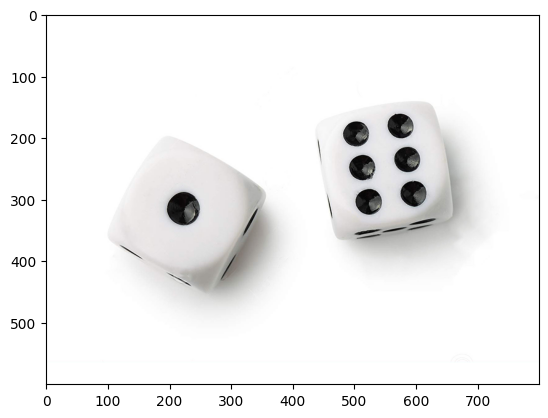

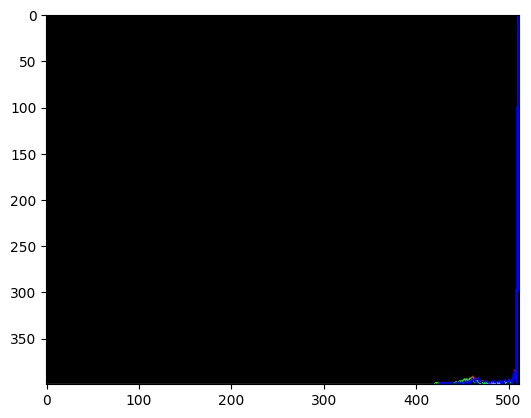

[[222 314  27]
 [586 232  23]
 [502 192  18]
 [572 180  18]
 [520 300  19]
 [512 246  18]
 [594 286  19]]


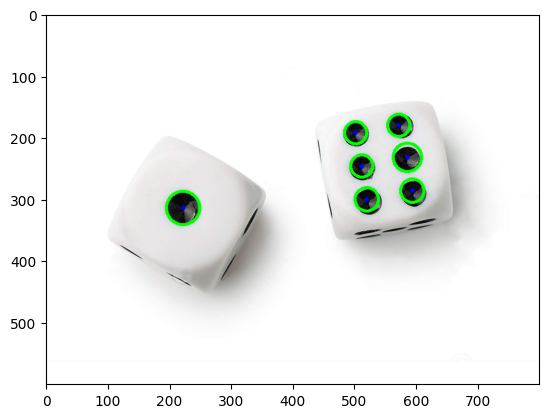

7


In [15]:
# Afbeelding inlezen
img3 = cv2.imread('dice3.png')

# CV2 leest standaard afbeeldingen in BGR in, vandaar de conversie naar RGB
rgb_img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

# Ook verwacht matplotlib rgb image ipv bgr voor kleur foto's
plt.imshow(rgb_img3)
plt.show()

# Histogram
histSize = 256
histRange = (0, 256)

bgr_planes = cv2.split(img3)
b_hist = cv2.calcHist(bgr_planes, [0], None, [histSize], histRange, accumulate=False)
g_hist = cv2.calcHist(bgr_planes, [1], None, [histSize], histRange, accumulate=False)
r_hist = cv2.calcHist(bgr_planes, [2], None, [histSize], histRange, accumulate=False)

hist_w = 512
hist_h = 400
bin_w = int(round( hist_w/histSize ))

cv2.normalize(b_hist, b_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
cv2.normalize(g_hist, g_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
cv2.normalize(r_hist, r_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)

histImage = np.zeros((hist_h, hist_w, 3), dtype=np.uint8)

for i in range(1, histSize):
    cv2.line(histImage, ( bin_w*(i-1), hist_h - int(b_hist[i-1]) ),
            ( bin_w*(i), hist_h - int(b_hist[i]) ),
            ( 255, 0, 0), thickness=2)
    cv2.line(histImage, ( bin_w*(i-1), hist_h - int(g_hist[i-1]) ),
            ( bin_w*(i), hist_h - int(g_hist[i]) ),
            ( 0, 255, 0), thickness=2)
    cv2.line(histImage, ( bin_w*(i-1), hist_h - int(r_hist[i-1]) ),
            ( bin_w*(i), hist_h - int(r_hist[i]) ),
            ( 0, 0, 255), thickness=2)

plt.imshow(histImage)
plt.show()

# Converteert de originele img afbeelding naar gray
# Waarom? 1 kanaal == simpeler & handig voor edge detection
gray_img = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

# cv2.Canny(afbeelding,lageTH, hogeTH, apertureSize = 3 recommended) zie bronnen
# afbeelding input is 8 bit nodig -> dus 1 kanaals gray_img
detected_edges = cv2.Canny(gray_img, 30, 100, apertureSize=3)

# Zie uitleg van HoughCircles, helemaal onderaan
circles = cv2.HoughCircles(detected_edges, cv2.HOUGH_GRADIENT, 1, minDist=20,
                            param1=50, param2=25, minRadius=0, maxRadius=30)

# Check if any circles were detected
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    print(circles)
    for (x, y, r) in circles:
        cv2.circle(rgb_img3, (x, y), r, (0, 255, 0), 4)
else:
    print("No circles were detected.")
    plt.imshow(detected_edges, cmap='gray')


for i in circles:
    # draw the outer circle
    cv2.circle(rgb_img3,(int(i[0]),int(i[1])),int(i[2]),(0,255,0),2)
    # draw the center of the circle
    cv2.circle(rgb_img3,(int(i[0]),int(i[1])),2,(0,0,255),3)


plt.imshow(rgb_img3)
plt.show()
print(len(circles))

## Dice 4

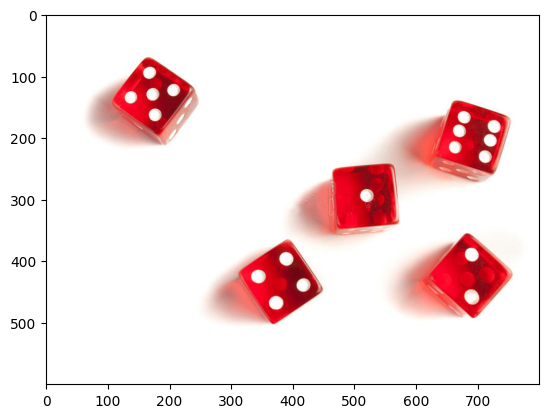

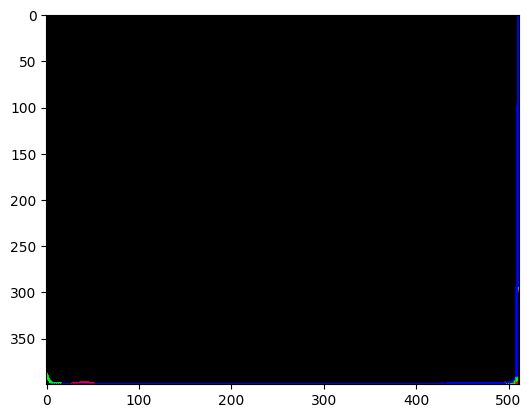

[[712 230  11]
 [374 466  11]
 [690 458  13]
 [726 182  12]
 [692 388  12]
 [672 190  10]
 [176 162  12]
 [678 168  10]
 [418 440  10]
 [390 398  10]
 [720 204  10]
 [206 122   9]
 [520 294   9]
 [344 426  11]
 [136 136  10]
 [172 132   9]
 [662 216  10]
 [166  94   9]]


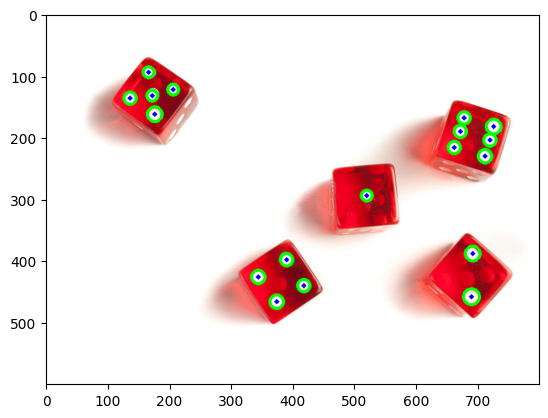

18


In [16]:
# Afbeelding inlezen
img4 = cv2.imread('dice4.png')

# CV2 leest standaard afbeeldingen in BGR in, vandaar de conversie naar RGB
rgb_img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

# Ook verwacht matplotlib rgb image ipv bgr voor kleur foto's
plt.imshow(rgb_img4)
plt.show()

# Histogram
histSize = 256
histRange = (0, 256)

bgr_planes = cv2.split(img4)
b_hist = cv2.calcHist(bgr_planes, [0], None, [histSize], histRange, accumulate=False)
g_hist = cv2.calcHist(bgr_planes, [1], None, [histSize], histRange, accumulate=False)
r_hist = cv2.calcHist(bgr_planes, [2], None, [histSize], histRange, accumulate=False)

hist_w = 512
hist_h = 400
bin_w = int(round( hist_w/histSize ))

cv2.normalize(b_hist, b_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
cv2.normalize(g_hist, g_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
cv2.normalize(r_hist, r_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)

histImage = np.zeros((hist_h, hist_w, 3), dtype=np.uint8)

for i in range(1, histSize):
    cv2.line(histImage, ( bin_w*(i-1), hist_h - int(b_hist[i-1]) ),
            ( bin_w*(i), hist_h - int(b_hist[i]) ),
            ( 255, 0, 0), thickness=2)
    cv2.line(histImage, ( bin_w*(i-1), hist_h - int(g_hist[i-1]) ),
            ( bin_w*(i), hist_h - int(g_hist[i]) ),
            ( 0, 255, 0), thickness=2)
    cv2.line(histImage, ( bin_w*(i-1), hist_h - int(r_hist[i-1]) ),
            ( bin_w*(i), hist_h - int(r_hist[i]) ),
            ( 0, 0, 255), thickness=2)

plt.imshow(histImage)
plt.show()

# Converteert de originele img afbeelding naar gray
# Waarom? 1 kanaal == simpeler & handig voor edge detection
gray_img = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)

# cv2.Canny(afbeelding,lageTH, hogeTH, apertureSize = 3 recommended) zie bronnen
# afbeelding input is 8 bit nodig -> dus 1 kanaals gray_img
detected_edges = cv2.Canny(gray_img, 30, 100, apertureSize=3)

# Zie uitleg van HoughCircles, helemaal onderaan
circles = cv2.HoughCircles(detected_edges, cv2.HOUGH_GRADIENT, 1, minDist=20,
                            param1=50, param2=25, minRadius=0, maxRadius=30)

# Check if any circles were detected
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    print(circles)
    for (x, y, r) in circles:
        cv2.circle(rgb_img4, (x, y), r, (0, 255, 0), 4)
else:
    print("No circles were detected.")
    plt.imshow(detected_edges, cmap='gray')


for i in circles:
    # draw the outer circle
    cv2.circle(rgb_img4,(int(i[0]),int(i[1])),int(i[2]),(0,255,0),2)
    # draw the center of the circle
    cv2.circle(rgb_img4,(int(i[0]),int(i[1])),2,(0,0,255),3)


plt.imshow(rgb_img4)
plt.show()
print(len(circles))

## Dice 5

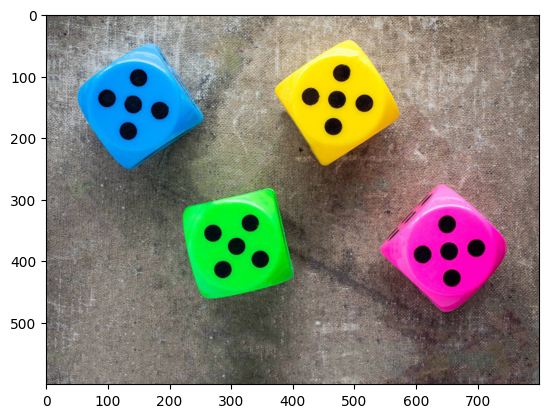

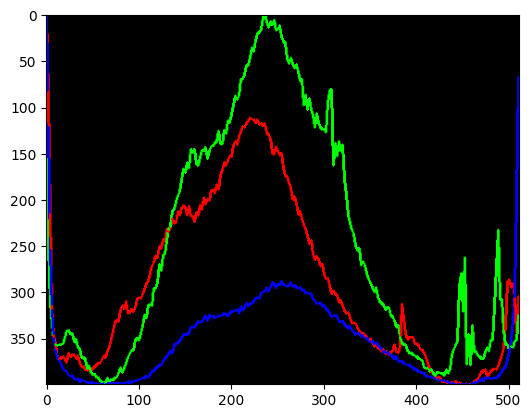

[[148 102  14]
 [470 138  14]
 [654 386  14]
 [478  94  14]
 [658 426  14]
 [516 144  15]
 [698 378  13]
 [270 354  13]
 [650 340  14]
 [142 146  15]
 [430 134  14]
 [610 388  14]
 [348 398  14]
 [184 156  15]
 [310 378  14]
 [330 338  14]
 [134 190  13]
 [466 182  13]
 [288 414  15]
 [ 98 134  12]]


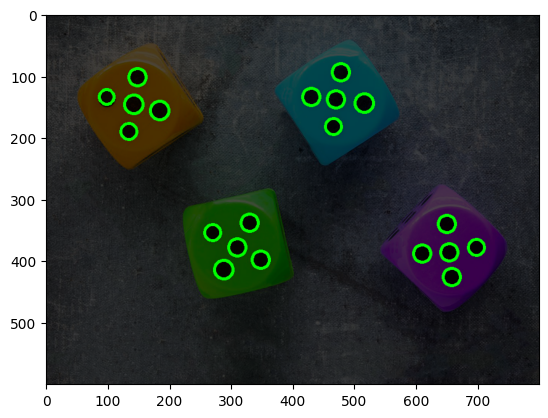

20


In [17]:
# Afbeelding inlezen
img5 = cv2.imread('dice5.png')

# CV2 leest standaard afbeeldingen in BGR in, vandaar de conversie naar RGB
rgb_img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)

# Ook verwacht matplotlib rgb image ipv bgr voor kleur foto's
plt.imshow(rgb_img5)
plt.show()


# Split kleuren voor histogram
bgr_planes = cv2.split(img5)

# Histogram
histSize = 256
histRange = (0, 256)

b_hist = cv2.calcHist(bgr_planes, [0], None, [histSize], histRange, accumulate=False)
g_hist = cv2.calcHist(bgr_planes, [1], None, [histSize], histRange, accumulate=False)
r_hist = cv2.calcHist(bgr_planes, [2], None, [histSize], histRange, accumulate=False)

hist_w = 512
hist_h = 400
bin_w = int(round( hist_w/histSize ))

cv2.normalize(b_hist, b_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
cv2.normalize(g_hist, g_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
cv2.normalize(r_hist, r_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)


histImage = np.zeros((hist_h, hist_w, 3), dtype=np.uint8)

for i in range(1, histSize):
    cv2.line(histImage, ( bin_w*(i-1), hist_h - int(b_hist[i-1]) ),
            ( bin_w*(i), hist_h - int(b_hist[i]) ),
            ( 255, 0, 0), thickness=2)
    cv2.line(histImage, ( bin_w*(i-1), hist_h - int(g_hist[i-1]) ),
            ( bin_w*(i), hist_h - int(g_hist[i]) ),
            ( 0, 255, 0), thickness=2)
    cv2.line(histImage, ( bin_w*(i-1), hist_h - int(r_hist[i-1]) ),
            ( bin_w*(i), hist_h - int(r_hist[i]) ),
            ( 0, 0, 255), thickness=2)

plt.imshow(histImage)
plt.show()

# Origineel kopieeren naar new_image
new_image = np.zeros(img5.shape, img5.dtype)

# Contrast- en helderheid instellen
alpha = 0.30 # Simple contrast control
beta = 0    # Simple brightness control

# Itereren over elke pixel
for y in range(img5.shape[0]):
    for x in range(img5.shape[1]):
        for c in range(img5.shape[2]):
            # Pixelwaarde aanpassen voor contrast en helderheid
            new_image[y,x,c] = np.clip(alpha*img5[y,x,c] + beta, 0, 255)

# Converteert de aangepaste contrast/helderheid img afbeelding naar gray
# Waarom? 1 kanaal == simpeler & handig voor edge detection
gray_img = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)


# cv2.Canny(afbeelding,lageTH, hogeTH, apertureSize = 3 recommended) zie bronnen
# afbeelding input is 8 bit nodig -> dus 1 kanaals gray_img
detected_edges = cv2.Canny(gray_img, 30, 100, apertureSize=3)

# Zie uitleg van HoughCircles, helemaal onderaan
circles = cv2.HoughCircles(detected_edges, cv2.HOUGH_GRADIENT, 1, minDist=20,
                            param1=210, param2=20, minRadius=0, maxRadius=20)

# Check if any circles were detected
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    print(circles)
    for (x, y, r) in circles:
        cv2.circle(new_image, (x, y), r, (0, 255, 0), 4)
    plt.imshow(new_image)
    plt.show()
else:
    print("No circles were detected.")
    plt.imshow(detected_edges, cmap='gray')

plt.show()
print(len(circles))

## Dice 6

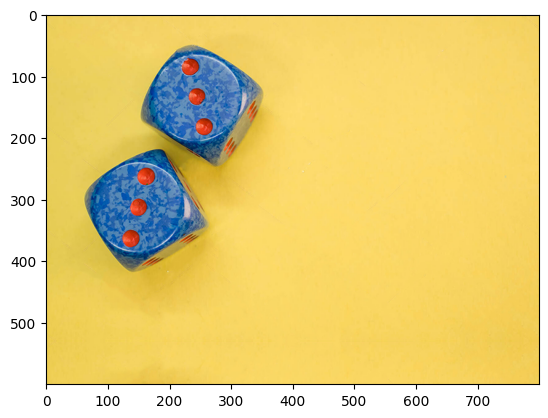

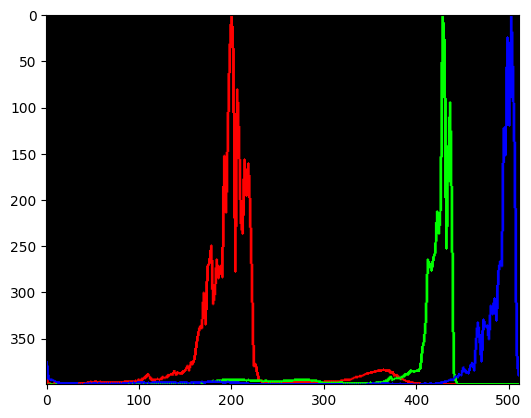

[[138 364  13]
 [162 262  15]
 [148 312  13]
 [256 184  14]
 [234  84  13]
 [244 136  12]]


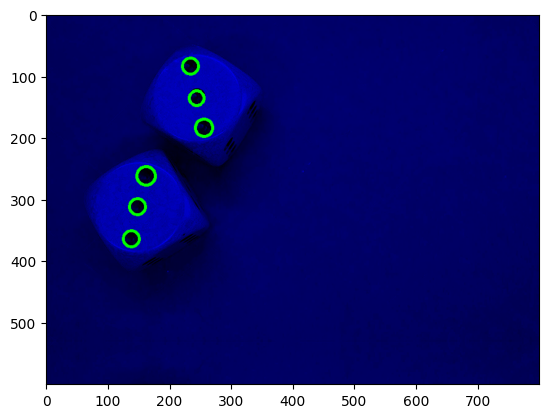

6


In [18]:
# Afbeelding inlezen
img6 = cv2.imread('dice6.png')

# CV2 leest standaard afbeeldingen in BGR in, vandaar de conversie naar RGB
rgb_img6 = cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img6)
plt.show()

# Blauw afzonderen
b, g, r = cv2.split(img6)
g = g * 0
r = r * 0

rgb_img6 = cv2.merge((r, g, b))


# Split kleuren voor histogram
bgr_planes = cv2.split(img6)

# Histogram
histSize = 256
histRange = (0, 256)

b_hist = cv2.calcHist(bgr_planes, [0], None, [histSize], histRange, accumulate=False)
g_hist = cv2.calcHist(bgr_planes, [1], None, [histSize], histRange, accumulate=False)
r_hist = cv2.calcHist(bgr_planes, [2], None, [histSize], histRange, accumulate=False)

hist_w = 512
hist_h = 400
bin_w = int(round( hist_w/histSize ))

cv2.normalize(b_hist, b_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
cv2.normalize(g_hist, g_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
cv2.normalize(r_hist, r_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)

histImage = np.zeros((hist_h, hist_w, 3), dtype=np.uint8)

for i in range(1, histSize):
    cv2.line(histImage, ( bin_w*(i-1), hist_h - int(b_hist[i-1]) ),
            ( bin_w*(i), hist_h - int(b_hist[i]) ),
            ( 255, 0, 0), thickness=2)
    cv2.line(histImage, ( bin_w*(i-1), hist_h - int(g_hist[i-1]) ),
            ( bin_w*(i), hist_h - int(g_hist[i]) ),
            ( 0, 255, 0), thickness=2)
    cv2.line(histImage, ( bin_w*(i-1), hist_h - int(r_hist[i-1]) ),
            ( bin_w*(i), hist_h - int(r_hist[i]) ),
            ( 0, 0, 255), thickness=2)

plt.imshow(histImage)
plt.show()

# Converteert de blauw afgezonderde img naar gray
# Waarom? 1 kanaal == simpeler & handig voor edge detection
gray_img = cv2.cvtColor(rgb_img6, cv2.COLOR_RGB2GRAY)

# cv2.Canny(afbeelding,lageTH, hogeTH, apertureSize = 3 recommended) zie bronnen
# afbeelding input is 8 bit nodig -> dus 1 kanaals gray_img
detected_edges = cv2.Canny(rgb_img6, 170, 420, apertureSize=3)  # Adjusted thresholds

# Zie uitleg van HoughCircles, helemaal onderaan
circles = cv2.HoughCircles(detected_edges, cv2.HOUGH_GRADIENT, 1, minDist=20,
                            param1=210, param2=20, minRadius=0, maxRadius=50)  # Reduced param2

# Check if any circles were detected
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    print(circles)
    for (x, y, r) in circles:
        cv2.circle(rgb_img6, (x, y), r, (0, 255, 0), 4)
    plt.imshow(rgb_img6)
    plt.show()
else:
    print("No circles were detected.")
    plt.imshow(detected_edges, cmap='gray')

plt.show()
print(len(circles))




---

### cv2.HoughCircles(image, method, dp, minDist, param1, param2, minRadius, maxRadius)


**image**: Input image (edge-detected image).


**method**: Detection method, usually cv2.HOUGH_GRADIENT.


**dp**: Inverse ratio of the accumulator resolution to the image resolution.
A value of 1 means the accumulator has the same resolution as the input image.


**minDist**: Minimum distance between the centers of the detected circles.


**param1**: Higher threshold for the Canny edge detector (lower is twice smaller).


**param2**: Accumulator threshold for the circle centers. The smaller it is, the more false circles may be detected.


**minRadius**: Minimum circle radius.


**maxRadius**: Maximum circle radius.